# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Introduction
The task for this exercise is to select popular recipes to display on the home page to increase website traffic that results in more subscriptions.The current method of selecting popular recipes is based on personal preference which is not accurate. For this, I developed binary classification machine learning models, Logistic Regression and Gradient Boosting Classifier, to predict whether recipe will lead to high traffic or low traffic.

In [2]:
# Start coding here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The table comprises of 947 rows and 7 columns

In [3]:
df = pd.read_csv('recipe_site_traffic_2212.csv', index_col='recipe')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 1 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  574 non-null    object 
dtypes: float64(4), object(3)
memory usage: 59.2+ KB


# Data Validation

The data consists of :
- 
- **recipe** : numeric, unique identifier
- **calories** : numeric
- **carbohydrate** : numeric
- **sugar** : numeric
- **protein** : numeric
- **category** : type of recipe
- **servings** : numeric, number of servings
- **high_traffic** : if the traffic was high when this recipe was shown

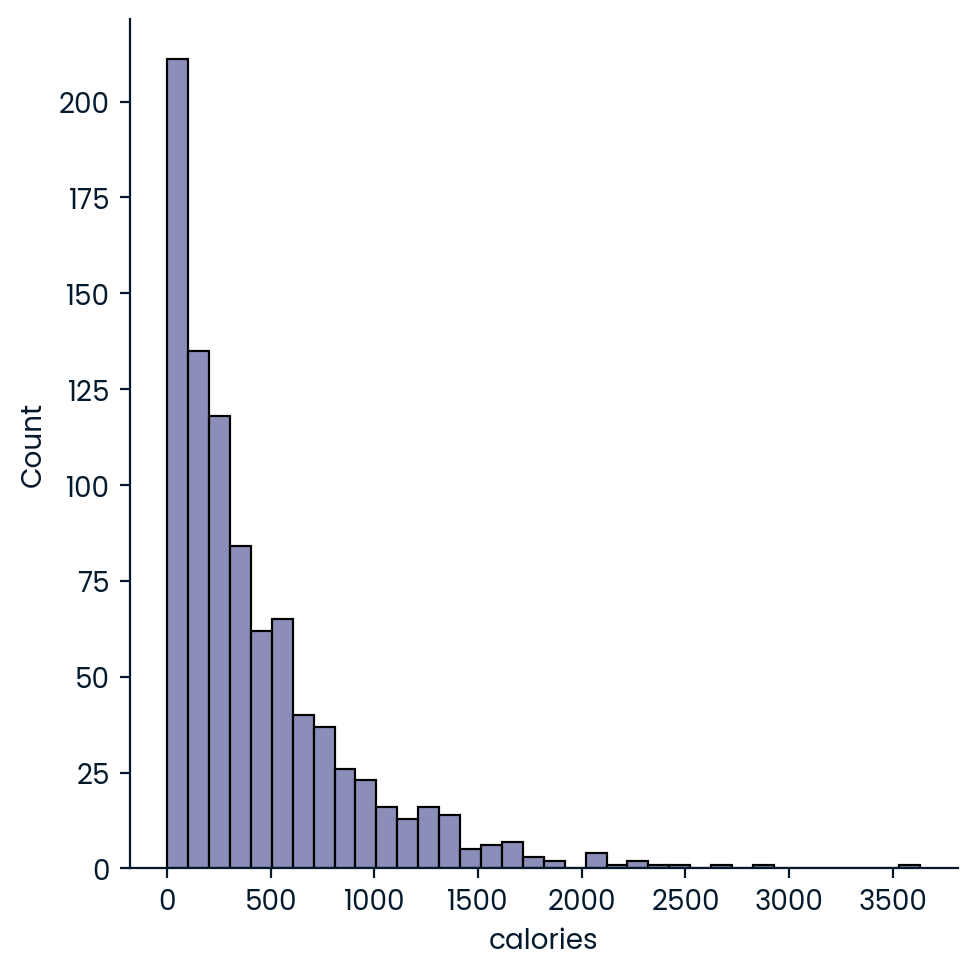

In [4]:
# Validate calories columns
sns.displot(df["calories"])
plt.show()

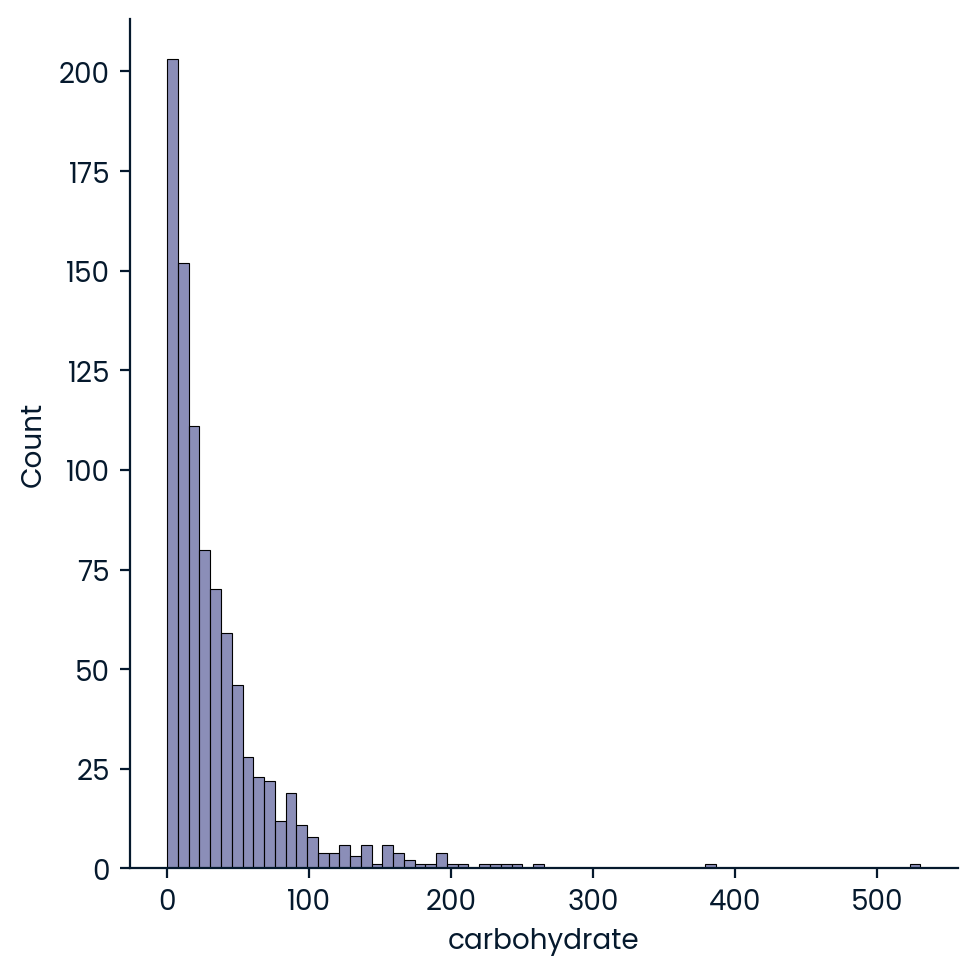

In [5]:
# Validate carbohydrate column
sns.displot(df["carbohydrate"])
plt.show()

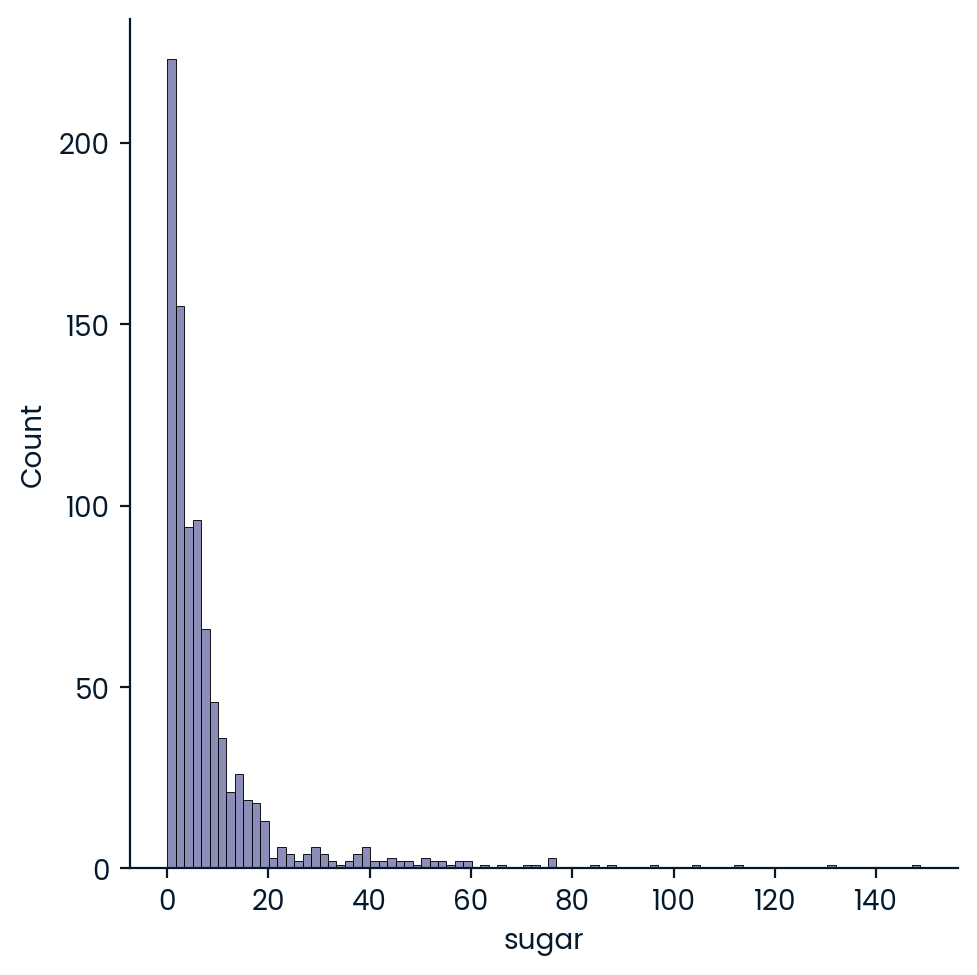

In [6]:
# Validate sugar column
sns.displot(df["sugar"])
plt.show()

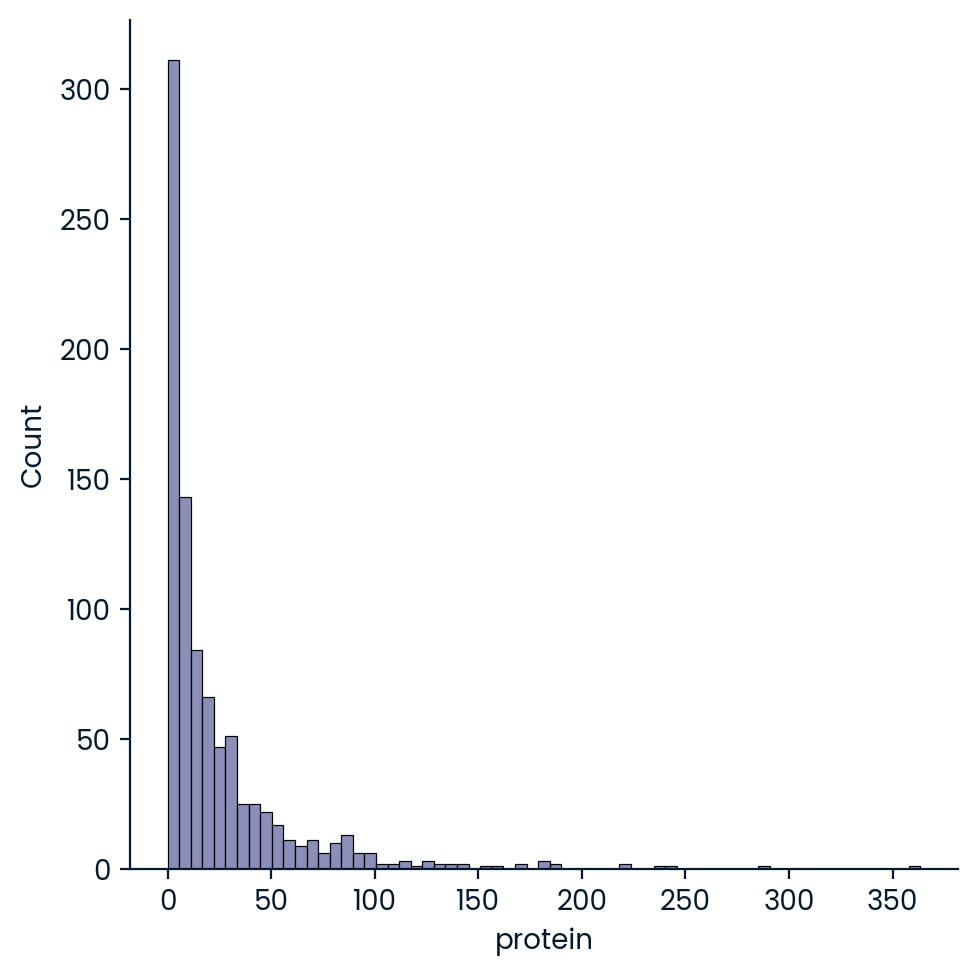

In [7]:
# Validate protein column
sns.displot(df["protein"])
plt.show()

In [8]:
# Validate 11 types of category
df["category"].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

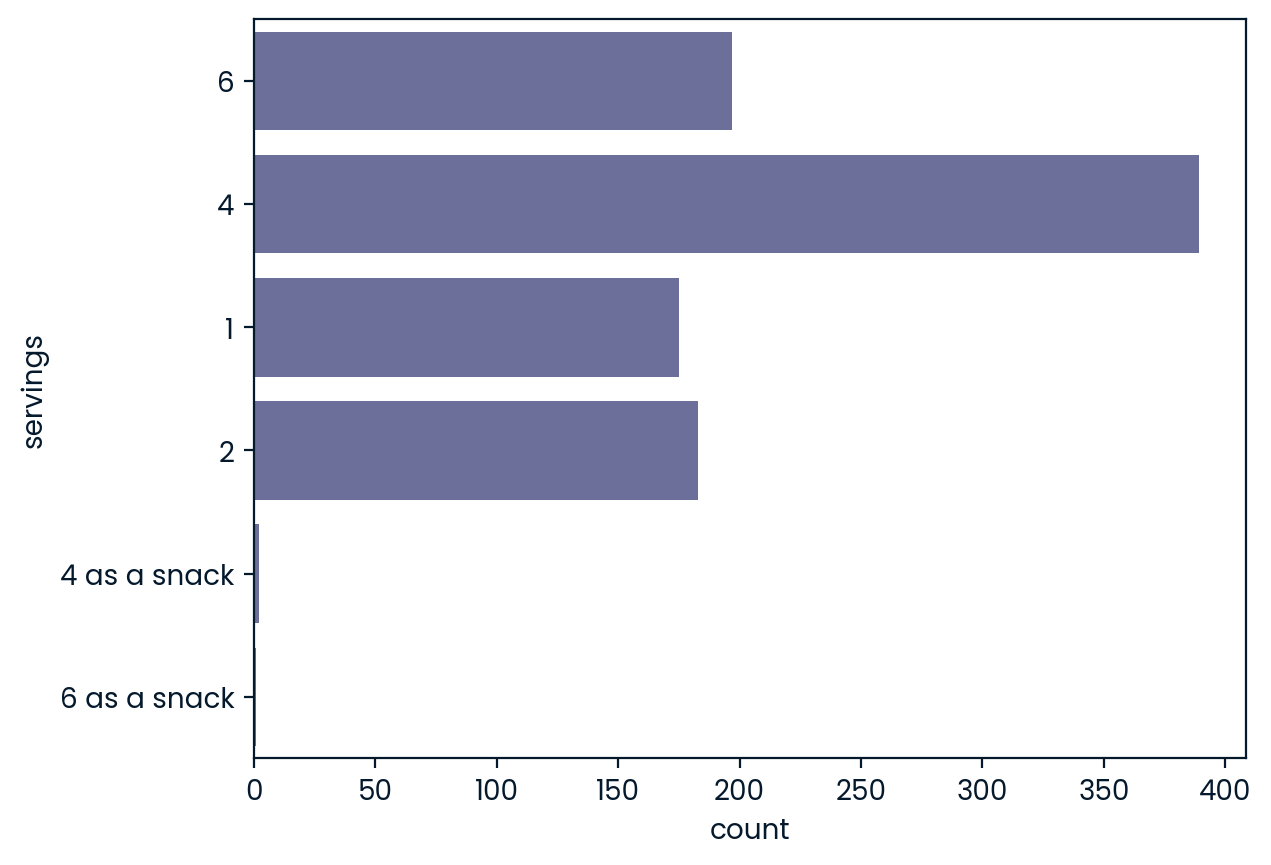

In [9]:
#Validate 6 types of servings
sns.countplot(df["servings"])
plt.show()

In [10]:
# Validate 2 types of high_traffic
df["high_traffic"].unique()

array(['High', nan], dtype=object)

## Data Cleaning

In servings columns replace '4 as a snack' with '4' and '6 as a snack' with '6'

In [11]:
df["servings"] = df["servings"].str.replace(' as a snack', '')

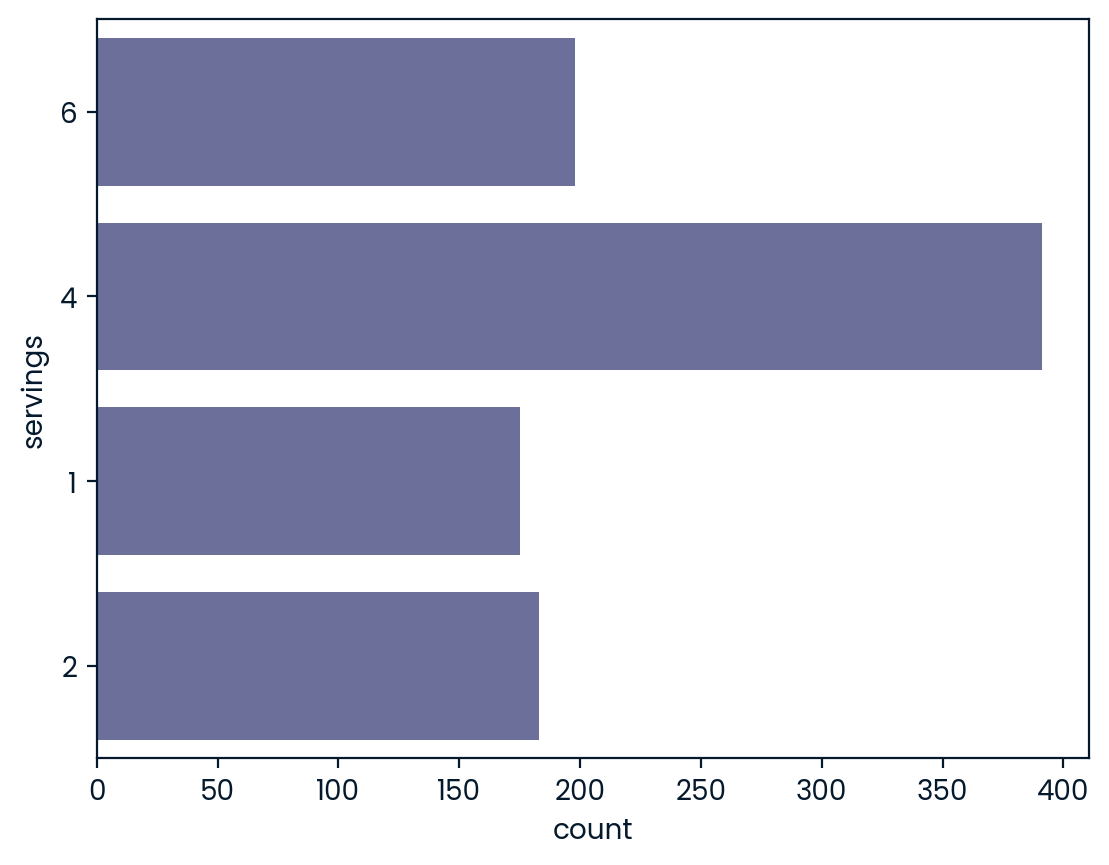

In [12]:
sns.countplot(df["servings"])
plt.show()

- There are some duplicated rows in the table, we will drop those rows.
- After dropping these rows we are left with 924 rows

In [13]:
df.drop_duplicates(inplace= True)
df.shape

(924, 7)

In category columns 'Chiken Breast' was changed to 'Chicken'

In [14]:
df["category"] = df["category"].str.replace('Chicken Breast', 'Chicken')
df["category"].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [15]:
df.isna().sum()

calories         29
carbohydrate     29
sugar            29
protein          29
category          0
servings          0
high_traffic    369
dtype: int64

In the 'high_traffic' column, 'high' is entered if the traffic was high else the field is missing.
So, I have filled missing values with 'Low'

In [16]:
# Label Encoding high_traffic column
df["high_traffic"] = df["high_traffic"].fillna('Low')

The four numeric columns calories, carbohydrates, sugar and protein contains 29 missing values, which is less than 5% of data size. So, we will drop the rows which contains these missing values.

In [17]:
# dropping missing values of these four columns
df.dropna(inplace = True)
df.shape

(895, 7)

In [18]:
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,Low
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,Low
6,691.15,3.46,1.65,53.93,One Dish Meal,2,High


Now there is no missing values and we have 895 rows and 7 rows

In [19]:
df.isna().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 2 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      895 non-null    object 
 5   servings      895 non-null    object 
 6   high_traffic  895 non-null    object 
dtypes: float64(4), object(3)
memory usage: 55.9+ KB


## Handling Outliers

There are some outliers present in the four numeric columns. So, we will handle outliers using IQR method.

In [21]:
def handle_outlier(df, col):
    Q3 = df[col].quantile(0.75)
    Q1 = df[col].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
num_columns = ["calories", "carbohydrate", "sugar", "protein"]
for col in num_columns:
    handle_outlier(df, col)

This visulaization represents the distribution of the four numeric columns after handling outliers

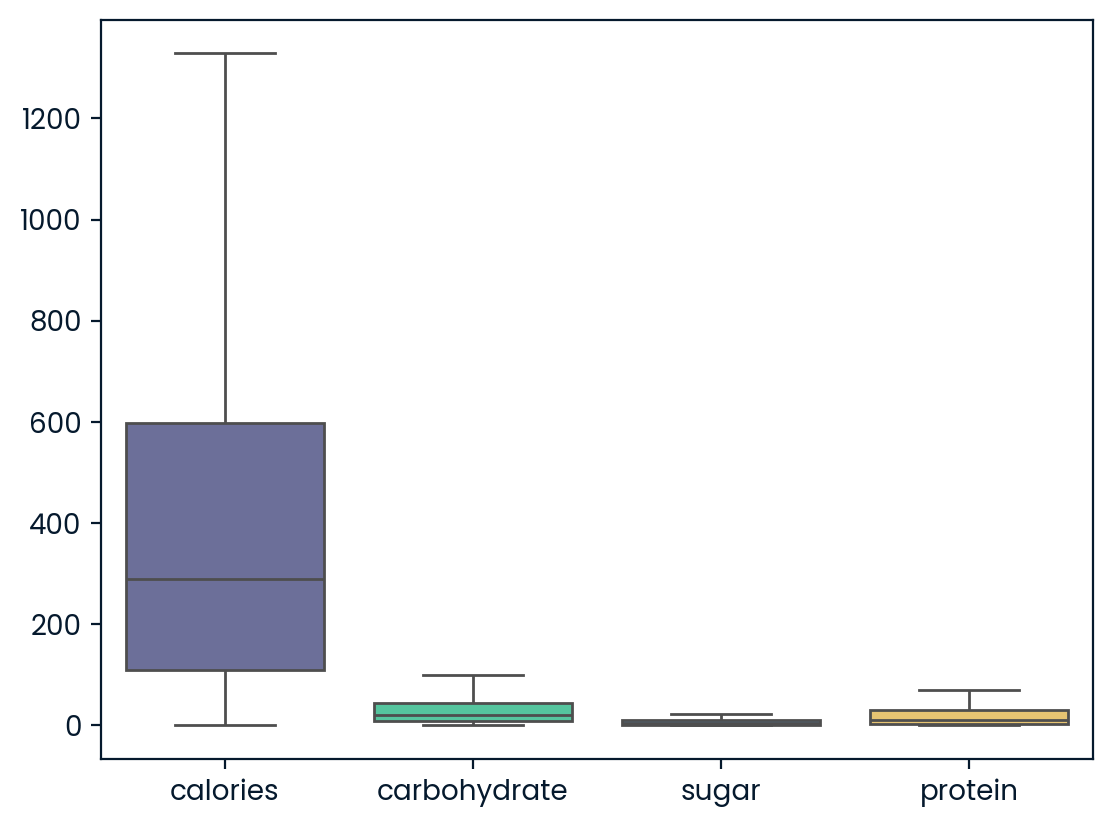

In [22]:
sns.boxplot(data=df[num_columns])
plt.show()

# Exploratory Data Analysis

This is the data after preprocessing

In [23]:
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
2,35.48,38.56,0.660,0.92,Potato,4,High
3,914.28,42.68,3.090,2.88,Breakfast,1,Low
4,97.03,30.56,21.965,0.02,Beverages,4,High
5,27.05,1.85,0.800,0.53,Beverages,4,Low
6,691.15,3.46,1.650,53.93,One Dish Meal,2,High


In [24]:
df.describe()

,calories,carbohydrate,sugar,protein
count,895.000000,895.000000,895.000000,895.000000
mean,413.361665,31.083430,6.834866,20.124053
std,378.241095,28.945415,6.624471,22.111812
min,0.140000,0.030000,0.010000,0.000000
25%,110.430000,8.375000,1.690000,3.195000
50%,288.550000,21.480000,4.550000,10.800000
75%,597.650000,44.965000,9.800000,30.200000
max,1328.480000,99.850000,21.965000,70.707500


From the heatmap below, we can conclude that there is positive relationship between protein and calories, positive relationship bwetween sugar and carbohydrates and negative relationship bwetween protein and sugar.

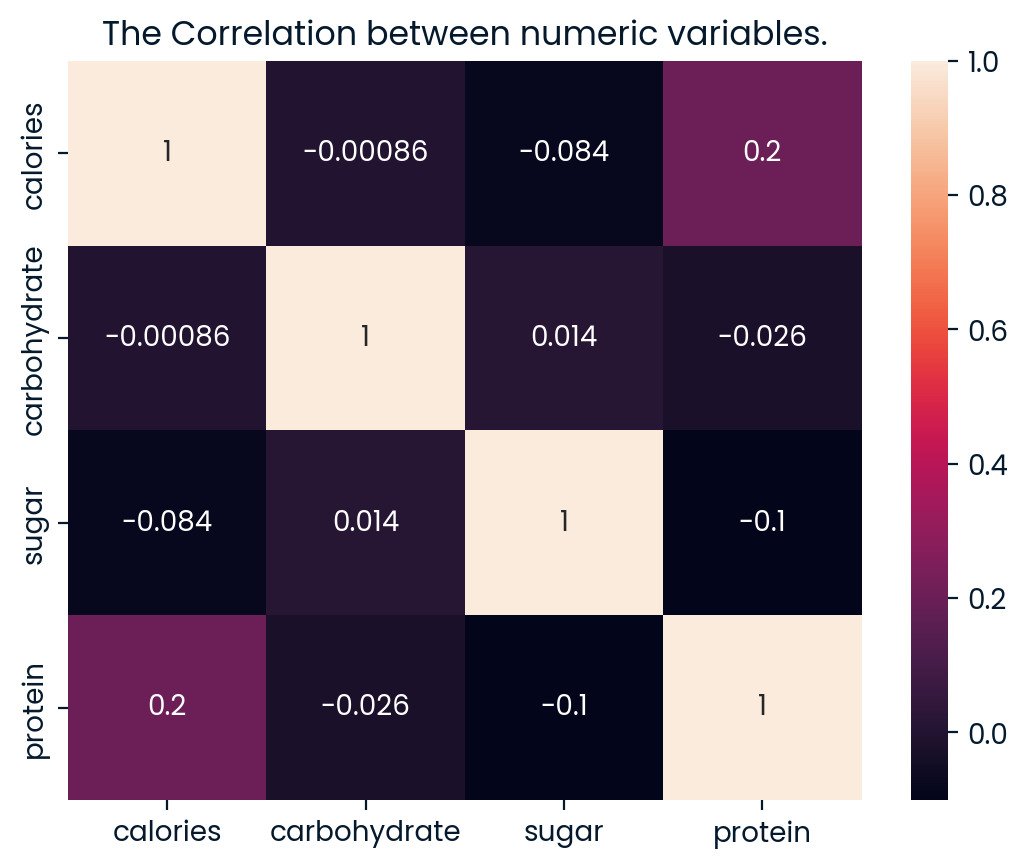

In [25]:
sns.heatmap(df.corr(), annot=True).set_title("The Correlation between numeric variables.")
plt.show()

The following visualization represents the relationship of calories, carbohydrates, sugar, protein with the target variable traffic. We have made four barplots to visualize the relationships.

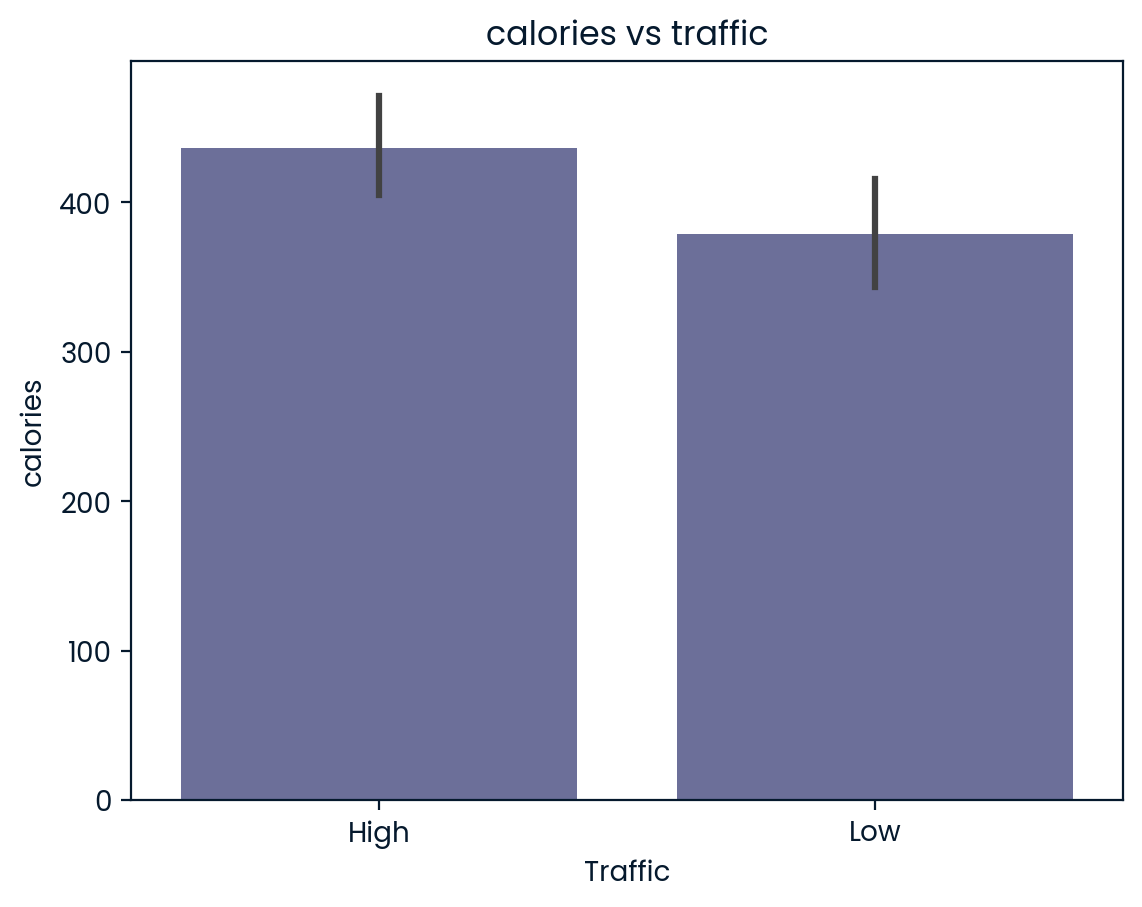

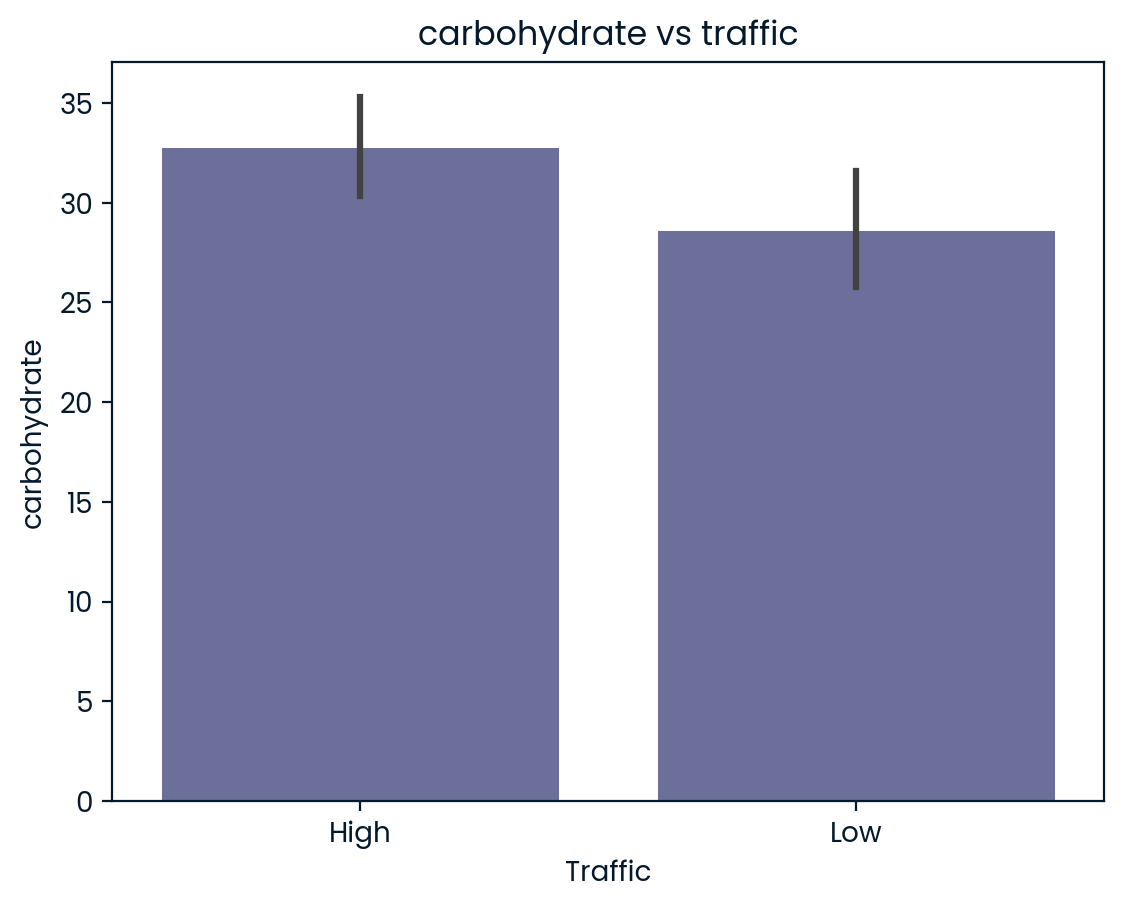

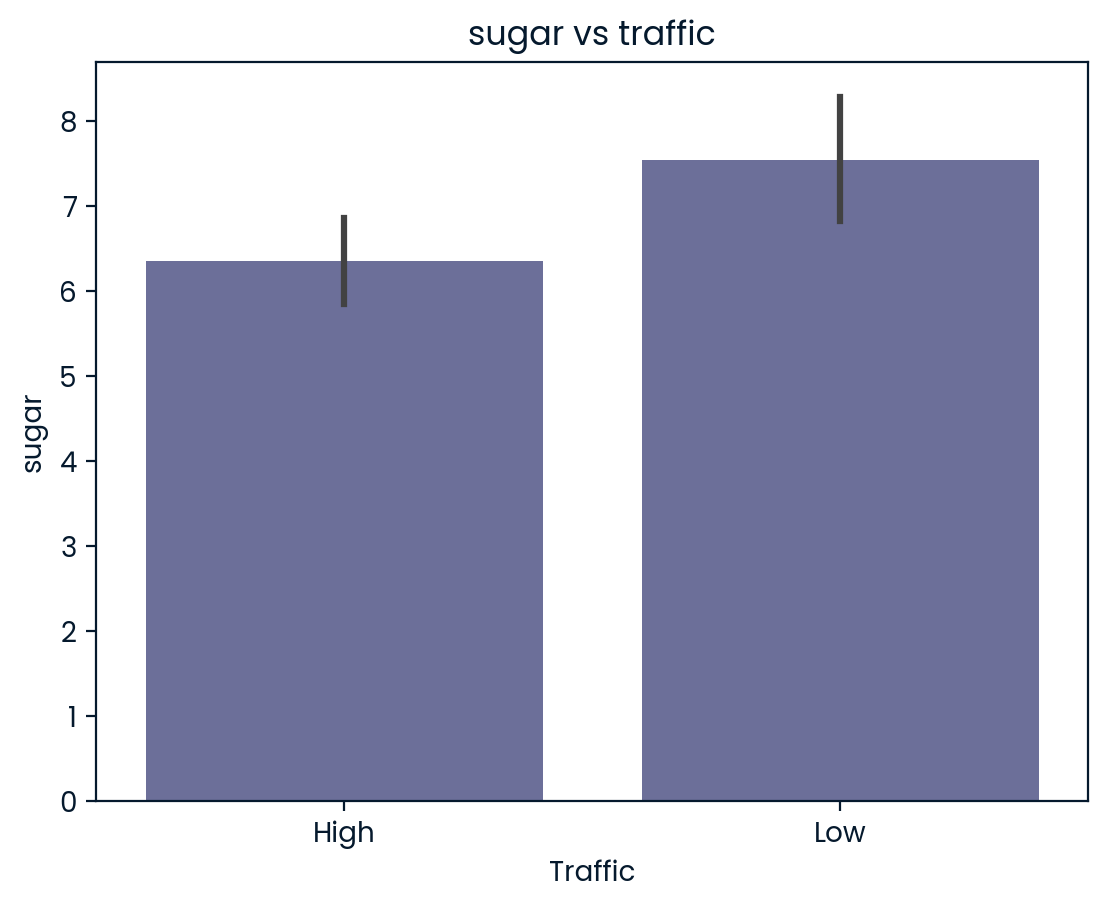

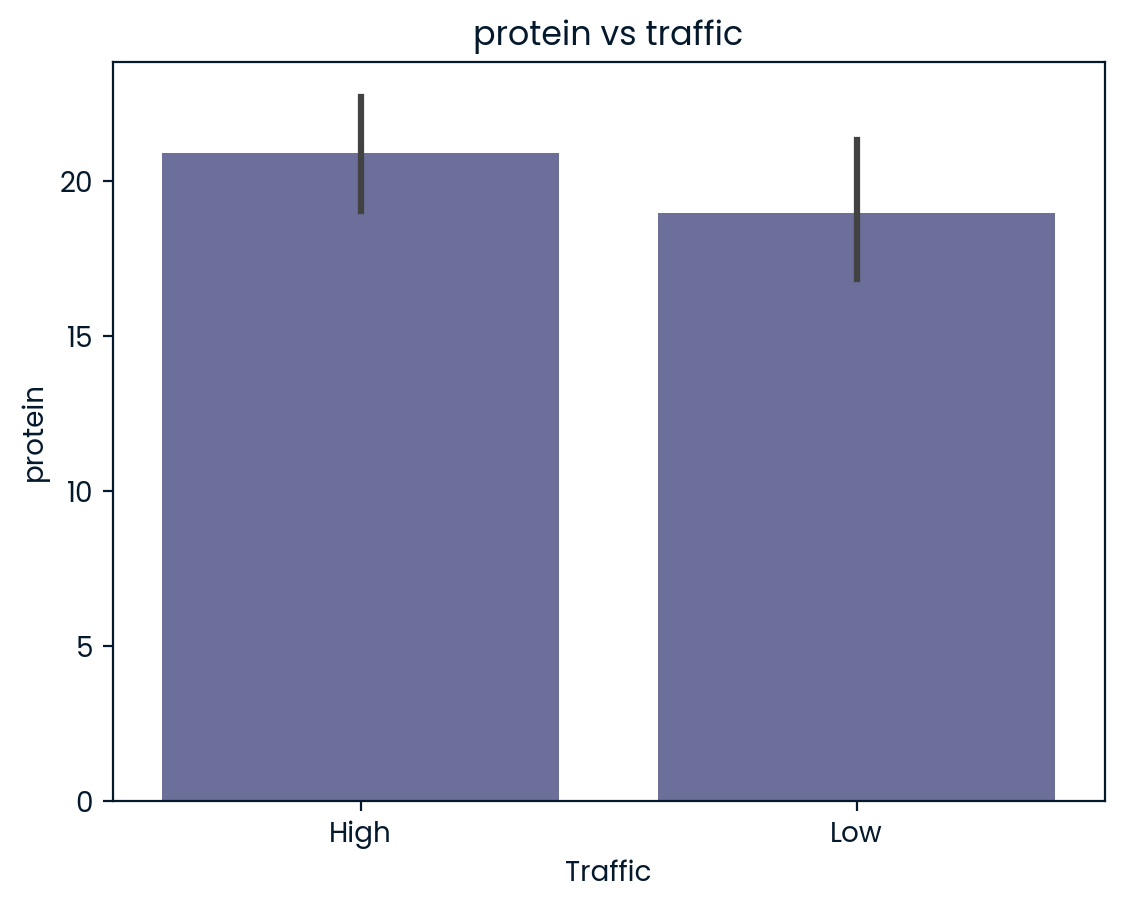

In [26]:
for col in num_columns:
    sns.barplot(df, x="high_traffic", y=col).set(xlabel="Traffic", ylabel=col, title=col + ' vs traffic')
    plt.show()

# Model Development

Preidting high traffic is a binary classification problem in machine learning. We have selected LogisticRegression as our primary model because of its simplicity. We have opted GradientBoostingClassifier as our comparision model. It is an ensemble learning model having high accuracy and robustness to overfitting.

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

## Encoding categorical variables

We encoded category columns with the help of dummy variables.
We also encoded high_traffic column.

In [28]:
df = pd.get_dummies(df, columns=['category'])

In [29]:
df["servings"] = df["servings"].astype('int')

In [30]:
df["high_traffic"] = np.where(df["high_traffic"] == "High", 1, 0)

## Splitting Data

We have chosen 'high_traffic' column as our target variable and rest of the columns as out features.

In [31]:
X = df.drop(["high_traffic"], axis=1).values
y = df["high_traffic"].values
print(X.shape, y.shape)

(895, 15) (895,)


## Standardization
We have standardized the numeric features

In [32]:
numeric_features = X[:, :5]

In [33]:
st_scaler = StandardScaler()
st_scaler.fit(numeric_features)
numeric_features_scaled = st_scaler.transform(numeric_features)

In [34]:
X_scaled = np.concatenate((numeric_features_scaled, X[:, 4 : ]), axis=1)

## Splitting the dataset into train and test

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [59]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(716, 16) (716,)
(179, 16) (179,)


# Model Evaluation

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report

## Logistic Regression
Trained LogisticRegression model and obtained 0.77 accuracy on the test data.

In [54]:
grid = {
    "C": np.logspace(-3, 3, 7),
    "penalty": ["l1", "l2", "elasticnet", None],
    "multi_class": ["auto", "ovr", "multinomial"]
}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train, y_train)
print("Tuned Hyperparameters", logreg_cv.best_params_)

Tuned Hyperparameters {'C': 1.0, 'multi_class': 'multinomial', 'penalty': 'l2'}


In [61]:
logreg = LogisticRegression(C=1, multi_class='multinomial', penalty = 'l2')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [62]:
print("Classification Report : ", classification_report(y_test, y_pred))

Classification Report :                precision    recall  f1-score   support

           0       0.72      0.68      0.70        73
           1       0.79      0.82      0.81       106

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179



## Gradient Boosting
Trained Gradient Boosting Classifier and obtained 0.83 accuracy on the test data.

In [41]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
print ('Training_GBC_score',round(GBC.score(X_train, y_train),3)) 
print ('Testing_GBC_score',round(GBC.score(X_test, y_test),3)) 

Training_GBC_score 0.865
Testing_GBC_score 0.682


In [42]:
parameters = {
    "n_estimators":[5,25, 125, 250,500],
    "max_depth":[1,3,5,7],
    "learning_rate":[0.01,0.1,1,10]}

cv = GridSearchCV(GBC,parameters,cv=5)

cv.fit(X_train, y_train)

print(cv.best_estimator_)

best=cv.best_estimator_
best.fit(X_train, y_train)
print(' Training_GBC_score',round(best.score(X_train, y_train),3)) 
print(' Testing_GBC_score',round(best.score(X_test, y_test),3)) 

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=500)
 Training_GBC_score 0.753
 Testing_GBC_score 0.659


In [43]:
best_scores={}
for x in range (100):
    X_train, X_test, y_train, y_test_XGB = train_test_split(X_scaled, y , test_size=0.20,
                                                        random_state=x)
    GBC = GradientBoostingClassifier(n_estimators=5, learning_rate=1, max_depth=1,random_state=x).fit(X_train, y_train);
    best_scores[x]=round(GBC.score(X_test, y_test_XGB),3)

best_random_state=max(best_scores, key=best_scores.get)
print('Best_testing_score:',max(best_scores.values()))
print('Best_testing_score at random state : ',best_random_state)

Best_testing_score: 0.827
Best_testing_score at random state :  10


In [44]:
X_train, X_test, y_train, y_test_XGB = train_test_split(X_scaled, y , test_size=0.20,
                                                        random_state=best_random_state)
GBC = GradientBoostingClassifier(n_estimators=5, learning_rate=1,                                           max_depth=1,random_state=best_random_state).fit(X_train, y_train)
y_pred_GBC = GBC.predict(X_test)

In [45]:
print("Classification Report : ", classification_report(y_test_XGB, y_pred_GBC))

Classification Report :                precision    recall  f1-score   support

           0       0.75      0.74      0.75        62
           1       0.86      0.87      0.87       117

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



# Business Metrics

## The business has two goals
1. Predict recipes with high traffic.
2. Achieve an 80% probability of predicting 'High' traffic for recipes.
- The Gradient Boosting Model has achieved both the goals as it has precision, recall and f1_score greater than 0.80

## Business KPI
The company wants to predict site traffic with at least 80% probablity. So, we have considered **accuracy** as KPI to compare two models. The higher the accuracy better the model perform. Logistic Regresson model has 0.77 accuracy whereas Gradient Boosting has 0.83 accuracy.

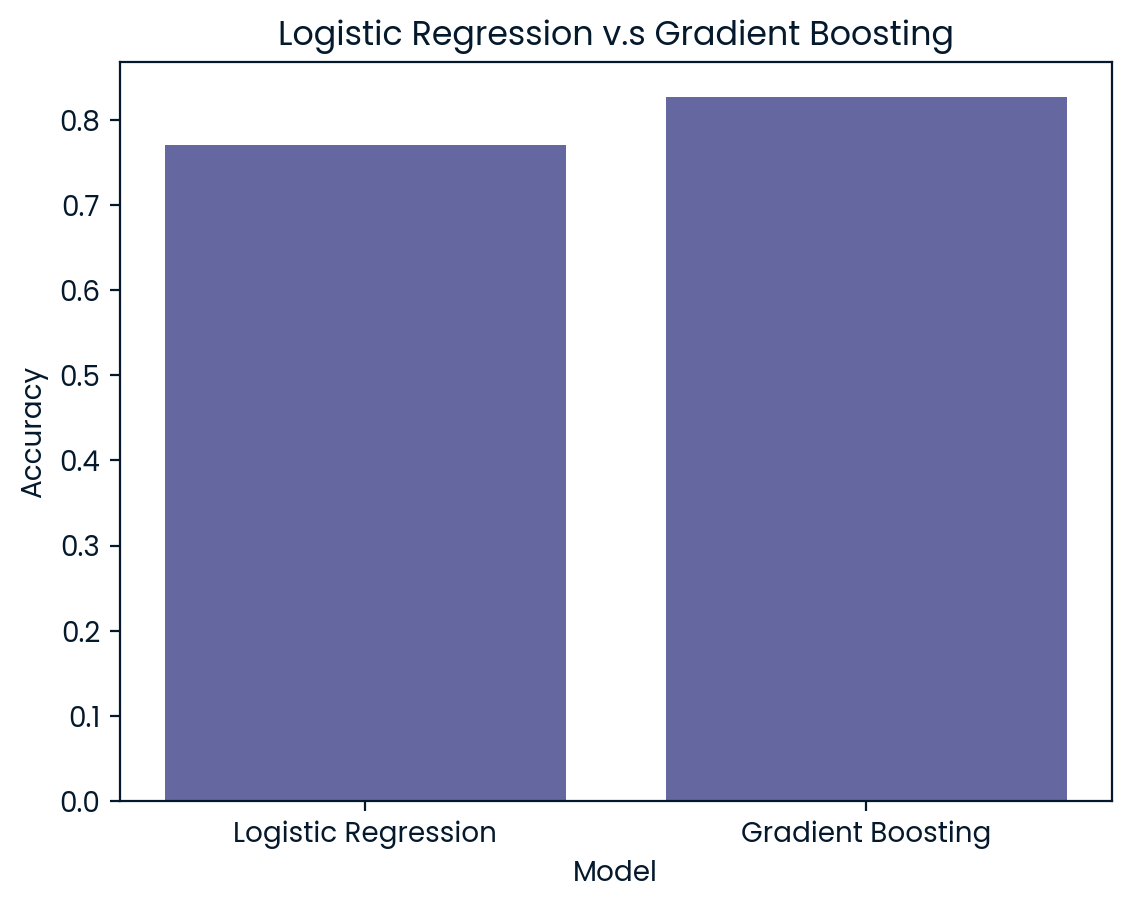

In [63]:
#In this visualization we have compared the two models
model1_accuracy =  0.77
model2_accuracy = 0.827

model_names = ['Logistic Regression', 'Gradient Boosting']
x = range(len(model_names))
accuracies = [model1_accuracy, model2_accuracy]
plt.bar(x, accuracies, tick_label=model_names)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Logistic Regression v.s Gradient Boosting')
plt.show()

## Recommendations
1. **Collect more data** to increase accuracy and robustness of the model.
2. **Balance data categories** : The number of High and Low values in target variables should be comparable to each other
3. Identify and fix errors after testing on test data.
4. Deploy the model into web or mobile applications.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation